<a href="https://colab.research.google.com/github/the-nameshifter/Camilo/blob/master/XGBoost_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost for cancer Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
  

In [3]:
Dataset = pd.read_csv('/content/Data.csv')
Dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
X = Dataset.iloc[:, :-1].values
y = Dataset.iloc[:,-1].values

In [5]:
X

array([[1000025,       5,       1, ...,       3,       1,       1],
       [1002945,       5,       4, ...,       3,       2,       1],
       [1015425,       3,       1, ...,       3,       1,       1],
       ...,
       [ 888820,       5,      10, ...,       8,      10,       2],
       [ 897471,       4,       8, ...,      10,       6,       1],
       [ 897471,       4,       8, ...,      10,       4,       1]])

# Splitting the dataset into the training set and test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# Training XGBoost on the Training set

In [7]:
from xgboost import XGBClassifier
Classifier = XGBClassifier()
Classifier.fit(X_train, y_train)


XGBClassifier()

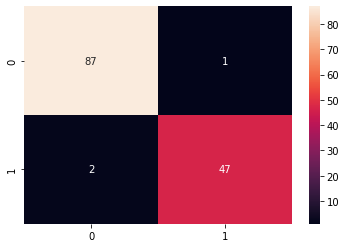

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
y_predict = Classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot= True)

In [12]:
accuracy_score(y_test, y_predict)

0.9781021897810219

# Applying k-fold Cross Validation

In [14]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Classifier, X = X_train, y = y_train, cv = 10)

print('Accuracy : {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std()*100))

Accuracy : 95.60 %
Standard Deviation : 1.69 %
